In [ ]:
!git clone https://github.com/Juanchumu/Aprender2016-2024.git

Cloning into 'Aprender2016-2024'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 193 (delta 85), reused 136 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (193/193), 24.96 MiB | 6.27 MiB/s, done.
Resolving deltas: 100% (85/85), done.


This command will clone the repository into your Colab environment. You can then navigate into the cloned directory to access its contents.

In [ ]:
import pandas as pd

# Define the path to the CSV file within the cloned repository
csv_file_path = '/content/Aprender2016-2024/data/processed/2024_Ap_56final.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_path}' into a DataFrame.")
    # Display the first 5 rows of the DataFrame
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the repository was cloned correctly and the file exists at this path.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

Successfully loaded '/content/Aprender2016-2024/data/processed/2024_Ap_56final.csv' into a DataFrame.


,ap01_Blanco,ap01_No_disponible,ap01_Multimarca,ap01_Enero,ap01_Febrero,ap01_Marzo,ap01_Abril,ap01_Mayo,ap01_Junio,ap01_Julio,...,mdesemp_Satisfactorio,mdesemp_Avanzado,ldesemp_Avanzado,ldesemp_Por_debajo_del_nivel_básico,ldesemp_Básico,ldesemp_Satisfactorio,lat,lon,sector_binario,ambito_binario
0,0.0,0.0,0.0,163.194454,172.328401,179.026348,165.722346,194.094108,173.800731,168.490485,...,652.667547,0.0,368.521151,233.849742,334.421866,1065.867144,-34.609558,-58.388790,1,1
1,0.0,0.0,0.0,152.926722,114.882036,112.947000,109.217088,97.608571,88.257356,96.099600,...,540.839144,0.0,237.659476,100.933346,184.848879,816.665477,-34.609558,-58.388790,0,1
2,0.0,0.0,0.0,76.537275,103.741219,89.627758,102.146837,102.859474,71.736601,59.624605,...,330.674332,0.0,109.108299,99.426893,188.279840,642.534935,-34.627458,-58.503098,1,1
3,0.0,0.0,0.0,113.811910,85.128344,97.396621,110.763027,107.759662,109.573695,116.601420,...,443.598637,0.0,159.169156,96.974195,202.605995,859.597609,-34.627458,-58.503098,0,1
4,0.0,0.0,0.0,80.797108,57.266647,67.166939,50.669412,71.947039,65.839905,72.117159,...,172.206362,0.0,58.636063,108.017385,177.083886,462.360389,-34.603006,-58.500717,1,1


In [ ]:
cols_matematica = [
    'mdesemp_Por_debajo_del_nivel_básico',
    'mdesemp_Satisfactorio',
    'mdesemp_Básico',
    'mdesemp_Avanzado'
]

df['matematica_suma'] = df[cols_matematica[0]] + df[cols_matematica[1]] + df[cols_matematica[2]] + df[cols_matematica[3]]

for col in cols_matematica:
    df[col] = df[col] / df['matematica_suma']

cols_lengua = [
    'ldesemp_Por_debajo_del_nivel_básico',
    'ldesemp_Satisfactorio',
    'ldesemp_Básico',
    'ldesemp_Avanzado'
]

df['lengua_suma'] = df[cols_lengua[0]] + df[cols_lengua[1]] + df[cols_lengua[2]] + df[cols_lengua[3]]

for col in cols_lengua:
    df[col] = df[col] / df['lengua_suma']

In [ ]:
df[cols_lengua].head()

,ldesemp_Por_debajo_del_nivel_básico,ldesemp_Satisfactorio,ldesemp_Básico,ldesemp_Avanzado
0,0.116770,0.532226,0.166989,0.184016
1,0.075317,0.609403,0.137936,0.177344
2,0.095663,0.618208,0.181152,0.104977
3,0.073557,0.652027,0.153682,0.120734
4,0.134000,0.573579,0.219680,0.072741


Utilizando GMM para genar una columna de categorías (clusters), como etiqueta supervisada.

Evaluating GMM for different number of components (2 to 5):
Components: 2, AIC: -32848.33, BIC: -32700.07
Components: 3, AIC: -32949.64, BIC: -32724.70
Components: 4, AIC: -33159.30, BIC: -32857.67
Components: 5, AIC: -33811.03, BIC: -33432.72
Components: 6, AIC: -33833.19, BIC: -33378.20
Components: 7, AIC: -33152.69, BIC: -32621.01
Components: 8, AIC: -33115.72, BIC: -32507.35
Components: 9, AIC: -33102.03, BIC: -32416.97
Components: 10, AIC: -33078.48, BIC: -32316.74
Components: 11, AIC: -33758.07, BIC: -32919.65
Components: 12, AIC: -33726.79, BIC: -32811.68
Components: 13, AIC: -33777.89, BIC: -32786.10
Components: 14, AIC: -33771.20, BIC: -32702.72
Components: 15, AIC: -33759.15, BIC: -32613.99


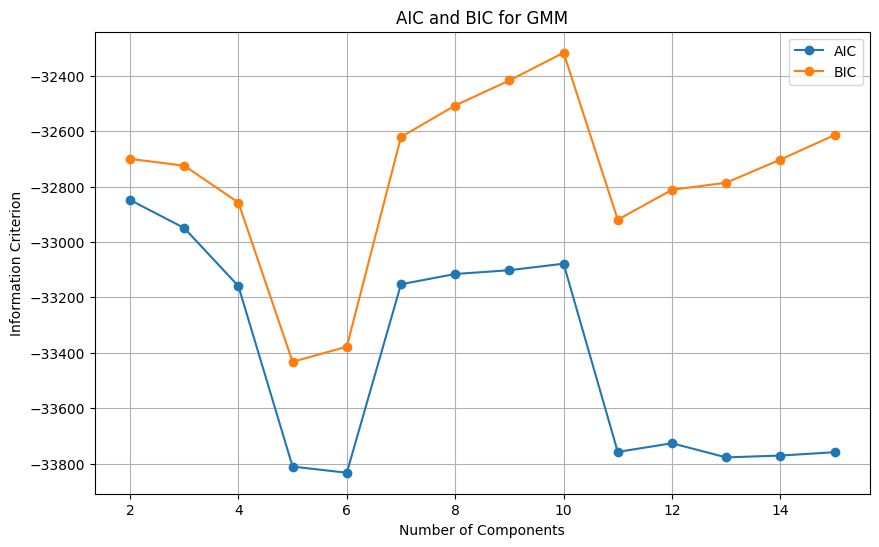


Optimal number of components based on BIC: 5
Optimal number of components based on AIC: 6


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Select the data for clustering
X = df[cols_matematica].copy()
X = X.fillna(0) # Handle NaN values as before

# Range of components to evaluate
n_components_range = range(2, 16)
aic = []
bic = []

print("Evaluating GMM for different number of components (2 to 5):")
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    a = gmm.aic(X)
    b = gmm.bic(X)
    aic.append(a)
    bic.append(b)
    print(f"Components: {n}, AIC: {a:.2f}, BIC: {b:.2f}")

# Plotting AIC and BIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components based on BIC (often preferred for model selection)
optimal_n_bic = n_components_range[np.argmin(bic)]
optimal_n_aic = n_components_range[np.argmin(aic)]

print(f"\nOptimal number of components based on BIC: {optimal_n_bic}")
print(f"Optimal number of components based on AIC: {optimal_n_aic}")


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Select the data for clustering
X = df[cols_matematica].copy()

# Handle potential NaN values (e.g., fill with 0 or mean, depending on context)
# For GMM, NaNs can cause issues. Filling with 0 as a common approach.
# Consider a more sophisticated imputation if appropriate for your data.
X = X.fillna(0)

# Initialize and fit the Gaussian Mixture Model with 5 components
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X)

# Predict the cluster for each data point
df['gmm_cluster_matematica'] = gmm.predict(X)

print(f"Creado el cluster para matematica con {n_components} grupos.")
print("Primeras 5 filas con la columna de clusters agredada:")
display(df[['mdesemp_Por_debajo_del_nivel_básico', 'mdesemp_Satisfactorio',
            'mdesemp_Básico', 'mdesemp_Avanzado', 'gmm_cluster_matematica']].head())
print("Distribucion del cluster de matematica:")
print(df['gmm_cluster_matematica'].value_counts().sort_index())

Creado el cluster para matematica con 3 grupos.
Primeras 5 filas con la columna de clusters agredada:


,mdesemp_Por_debajo_del_nivel_básico,mdesemp_Satisfactorio,mdesemp_Básico,mdesemp_Avanzado,gmm_cluster_matematica
0,0.390853,0.325900,0.283247,0.0,1
1,0.260887,0.403579,0.335533,0.0,1
2,0.336435,0.318155,0.345410,0.0,1
3,0.276872,0.336481,0.386647,0.0,1
4,0.469528,0.213630,0.316843,0.0,0


Distribucion del cluster de matematica:
gmm_cluster_matematica
0    570
1    281
2    376
Name: count, dtype: int64


Clusterin de lengua

Evaluating GMM for different number of components (2 to 15):
Components: 2, AIC: -22662.23, BIC: -22513.97
Components: 3, AIC: -23947.46, BIC: -23722.52
Components: 4, AIC: -24278.05, BIC: -23976.43
Components: 5, AIC: -24314.21, BIC: -23935.90
Components: 6, AIC: -24426.54, BIC: -23971.54
Components: 7, AIC: -24583.68, BIC: -24051.99
Components: 8, AIC: -24531.72, BIC: -23923.35
Components: 9, AIC: -24567.85, BIC: -23882.80
Components: 10, AIC: -24581.43, BIC: -23819.70
Components: 11, AIC: -24532.49, BIC: -23694.07
Components: 12, AIC: -24526.95, BIC: -23611.84
Components: 13, AIC: -24486.57, BIC: -23494.78
Components: 14, AIC: -24465.65, BIC: -23397.17


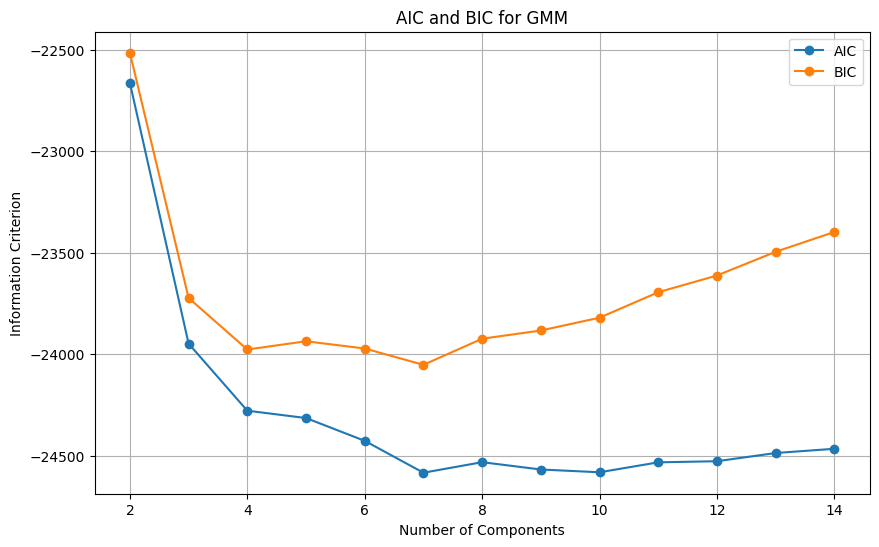


Optimal number of components based on BIC: 7
Optimal number of components based on AIC: 7


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Select the data for clustering
X = df[cols_lengua].copy()
X = X.fillna(0) # Handle NaN values as before

# Range of components to evaluate
n_components_range = range(2, 15)
aic = []
bic = []

print("Evaluating GMM for different number of components (2 to 15):")
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    a = gmm.aic(X)
    b = gmm.bic(X)
    aic.append(a)
    bic.append(b)
    print(f"Components: {n}, AIC: {a:.2f}, BIC: {b:.2f}")

# Plotting AIC and BIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components based on BIC (often preferred for model selection)
optimal_n_bic = n_components_range[np.argmin(bic)]
optimal_n_aic = n_components_range[np.argmin(aic)]

print(f"\nOptimal number of components based on BIC: {optimal_n_bic}")
print(f"Optimal number of components based on AIC: {optimal_n_aic}")


probe muchos grupos, voy a quedarme con 4 grupos, ya que para 5 no baja mucho y quedan grupos muy pequeños

In [ ]:

# Select the data for clustering
X = df[cols_lengua].copy()

# Handle potential NaN values (e.g., fill with 0 or mean, depending on context)
# For GMM, NaNs can cause issues. Filling with 0 as a common approach.
# Consider a more sophisticated imputation if appropriate for your data.
X = X.fillna(0)

# Initialize and fit the Gaussian Mixture Model with 5 components
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X)

# Predict the cluster for each data point
df['gmm_cluster_lengua'] = gmm.predict(X)

print(f"Creado el cluster para lengua con {n_components} grupos.")
print("Primeras 5 filas con la columna de clusters agredada:")
display(df[['mdesemp_Por_debajo_del_nivel_básico', 'mdesemp_Satisfactorio',
            'mdesemp_Básico', 'mdesemp_Avanzado', 'gmm_cluster_matematica']].head())
print("Distribucion del cluster de matematica:")
print(df['gmm_cluster_lengua'].value_counts().sort_index())

Creado el cluster para lengua con 4 grupos.
Primeras 5 filas con la columna de clusters agredada:


,mdesemp_Por_debajo_del_nivel_básico,mdesemp_Satisfactorio,mdesemp_Básico,mdesemp_Avanzado,gmm_cluster_matematica
0,0.390853,0.325900,0.283247,0.0,4
1,0.260887,0.403579,0.335533,0.0,4
2,0.336435,0.318155,0.345410,0.0,4
3,0.276872,0.336481,0.386647,0.0,4
4,0.469528,0.213630,0.316843,0.0,4


Distribucion del cluster de matematica:
gmm_cluster_lengua
0     96
1    293
2    586
3    252
Name: count, dtype: int64


Esto es correcto, se llama clustering + downstream classification
o label transfer.

Mean values of mathematics performance columns for each GMM cluster:


,mdesemp_Por_debajo_del_nivel_básico,mdesemp_Satisfactorio,mdesemp_Básico,mdesemp_Avanzado
gmm_cluster_matematica,,,,
0,0.563163,0.106602,0.330235,0.0
1,0.377681,0.239943,0.382376,0.0
2,0.777451,0.030340,0.192210,0.0


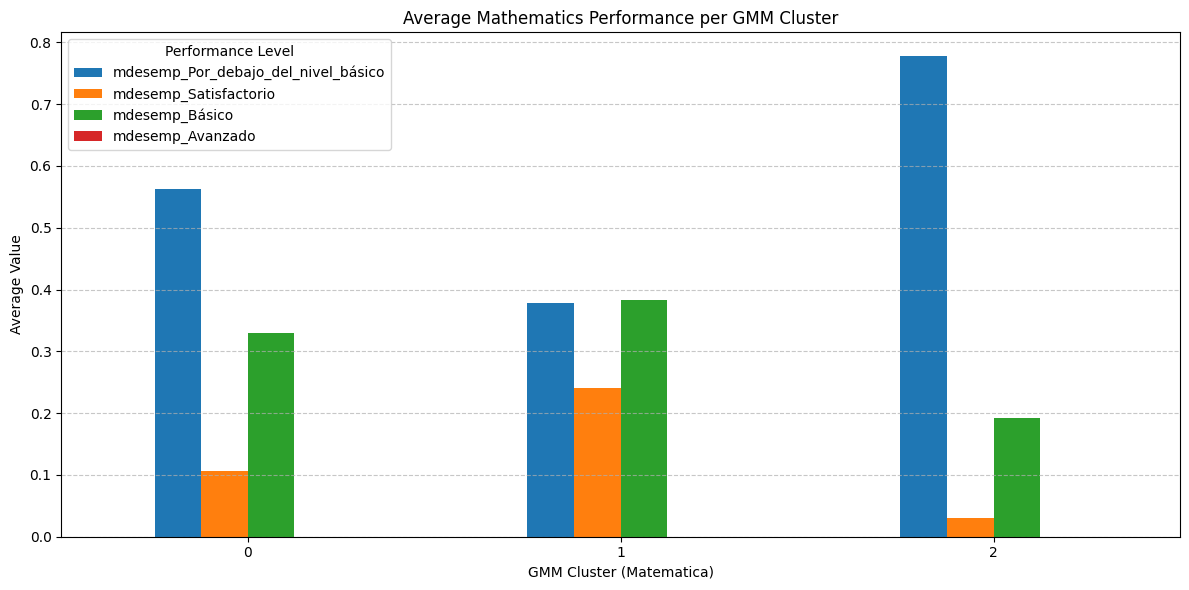

In [ ]:

# Group by 'gmm_cluster_matematica' and calculate the mean for the performance columns
cluster_profiles_matematica = df.groupby('gmm_cluster_matematica')[cols_matematica].mean()

print("Mean values of mathematics performance columns for each GMM cluster:")
display(cluster_profiles_matematica)

# Optionally, you can visualize these profiles to make them easier to interpret
import matplotlib.pyplot as plt
import seaborn as sns

cluster_profiles_matematica.plot(kind='bar', figsize=(12, 6))
plt.title('Average Mathematics Performance per GMM Cluster')
plt.ylabel('Average Value')
plt.xlabel('GMM Cluster (Matematica)')
plt.xticks(rotation=0)
plt.legend(title='Performance Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Mean values of mathematics performance columns for each GMM cluster:


,ldesemp_Por_debajo_del_nivel_básico,ldesemp_Satisfactorio,ldesemp_Básico,ldesemp_Avanzado
gmm_cluster_lengua,,,,
0,0.199939,0.395370,0.311383,0.093308
1,0.087263,0.618268,0.185048,0.109420
2,0.198109,0.454332,0.315223,0.032337
3,0.252708,0.394080,0.353212,0.000000


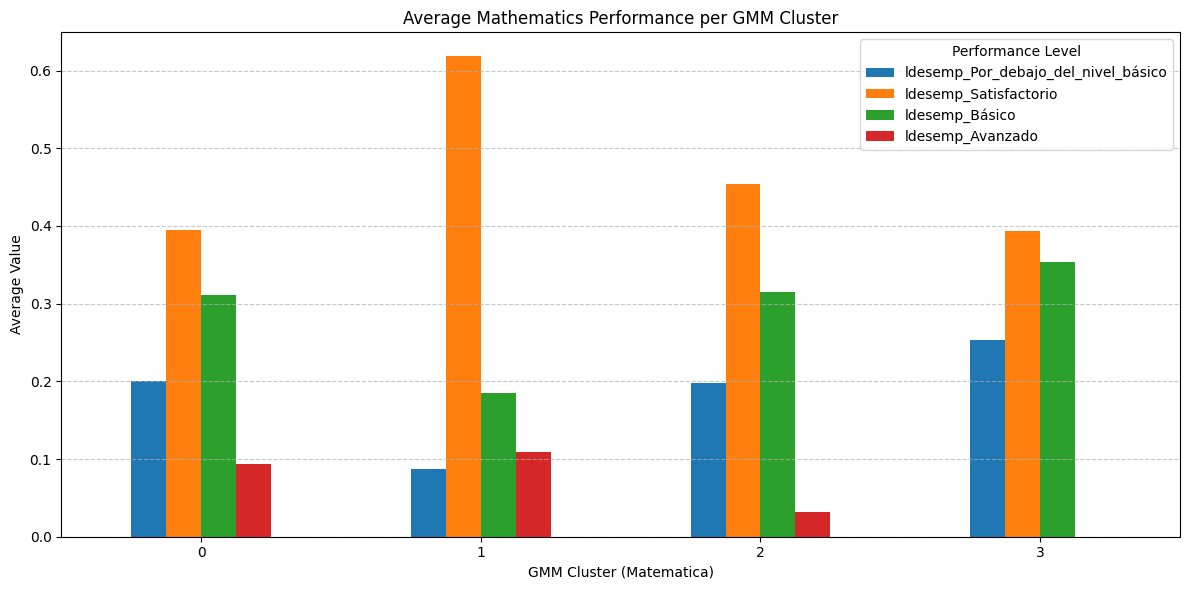

In [ ]:

# Group by 'gmm_cluster_matematica' and calculate the mean for the performance columns
cluster_profiles_lengua = df.groupby('gmm_cluster_lengua')[cols_lengua].mean()

print("Mean values of mathematics performance columns for each GMM cluster:")
display(cluster_profiles_lengua)

# Optionally, you can visualize these profiles to make them easier to interpret
import matplotlib.pyplot as plt
import seaborn as sns

cluster_profiles_lengua.plot(kind='bar', figsize=(12, 6))
plt.title('Average Lengua Performance per GMM Cluster')
plt.ylabel('Average Value')
plt.xlabel('GMM Cluster (Lengua)')
plt.xticks(rotation=0)
plt.legend(title='Performance Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

X_matematica = df[cols_matematica].copy()

# Instantiate PCA with 2 components
pca = PCA(n_components=2, random_state=42)

X_2D = pca.fit_transform(X_matematica)

X_2D

array([[-0.23472956,  0.16851689],
       [-0.39332784,  0.19099949],
       [-0.3027589 ,  0.12100295],
       ...,
       [ 0.23121477,  0.04370693],
       [-0.01048686,  0.00246262],
       [-0.3194988 ,  0.09109891]])

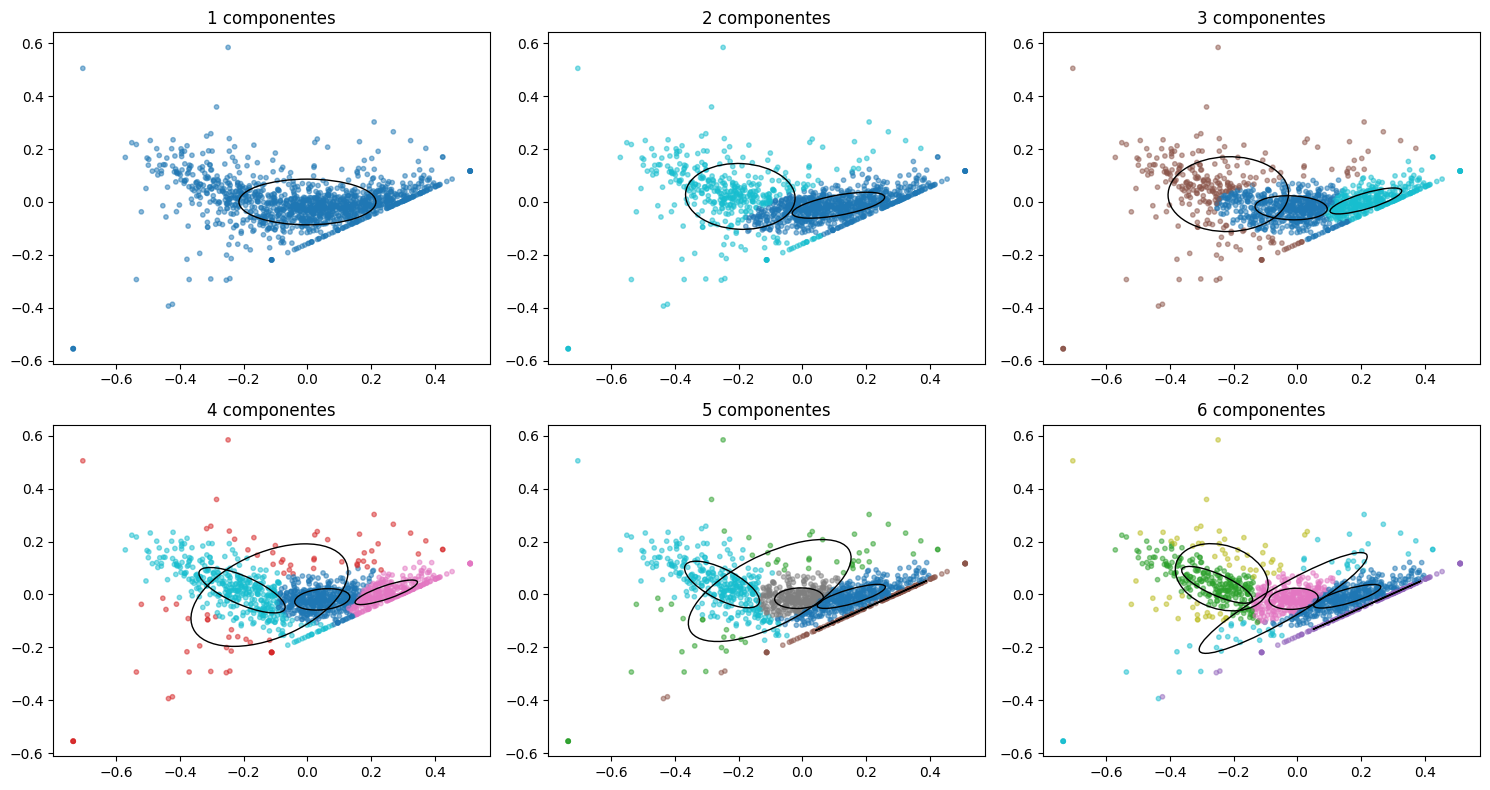

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def plot_gmm(gmm, X, ax, title):
    ax.set_title(title)

    labels = gmm.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='tab10', alpha=0.5)

    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        if covar.shape == (2, 2):  # full covariance
            U, s, _ = np.linalg.svd(covar)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            # Fix: Pass pos as the 'xy' argument
            ellip = Ellipse(xy=pos, width=width, height=height, angle=angle, edgecolor='black', facecolor='none')
            ax.add_patch(ellip)

# Graficamos varios modelos con distintos componentes
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
n_components_list = range(1, 7) # Changed range to match the number of subplots

for ax, n in zip(axes.ravel(), n_components_list):
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_2D)
    plot_gmm(gmm, X_2D, ax, f"{n} componentes")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
X_lengua = df[cols_lengua].copy()

# Instantiate PCA with 2 components
pca = PCA(n_components=2, random_state=42)

X_2D = pca.fit_transform(X_lengua)

X_2D

array([[ 0.15102731, -0.0515531 ],
       [ 0.23962144, -0.04406402],
       [ 0.20493586, -0.02325724],
       ...,
       [-0.13636633, -0.1371237 ],
       [ 0.11297078, -0.01917909],
       [ 0.2948233 , -0.02783132]])

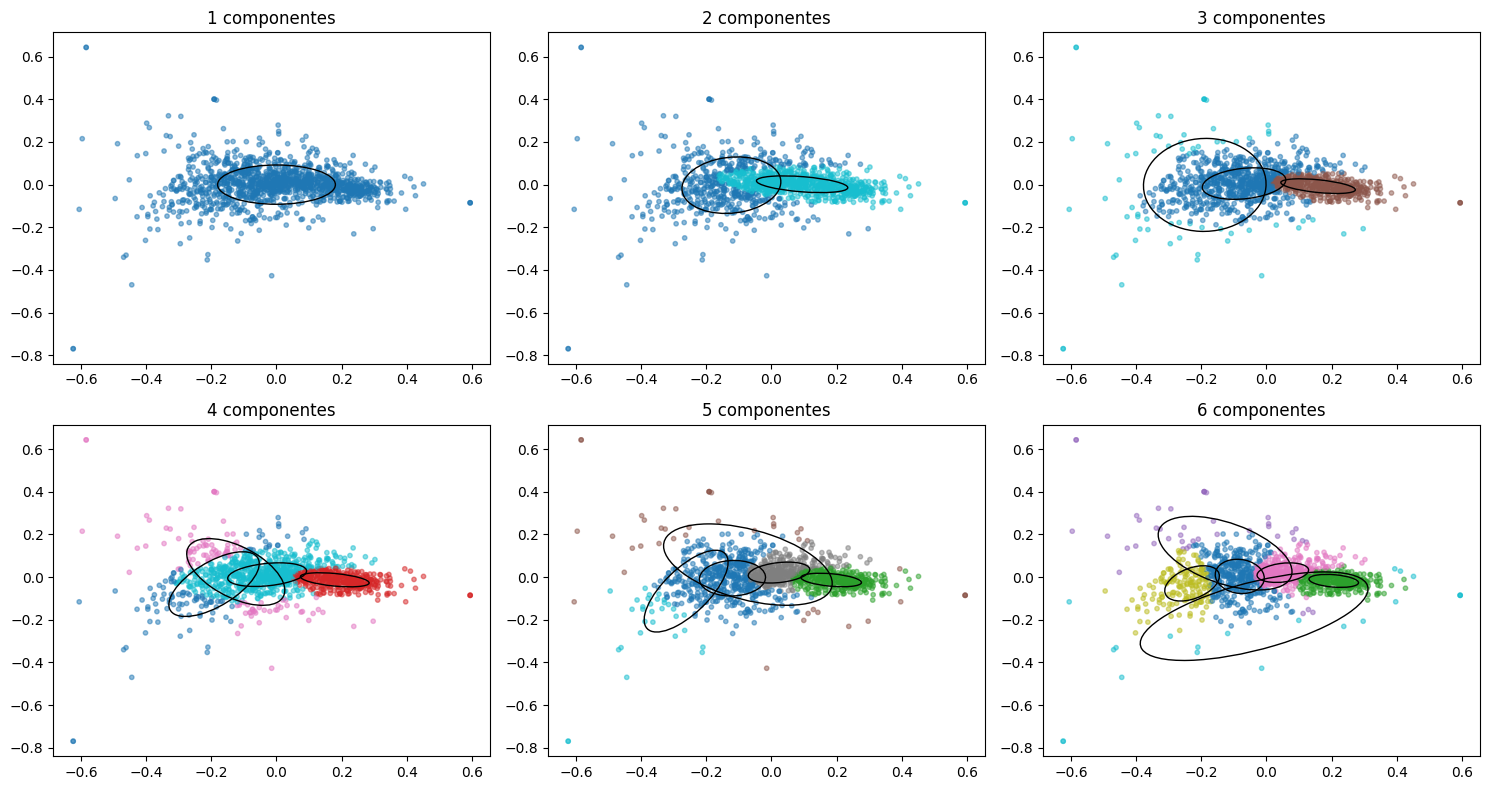

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def plot_gmm(gmm, X, ax, title):
    ax.set_title(title)

    labels = gmm.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='tab10', alpha=0.5)

    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        if covar.shape == (2, 2):  # full covariance
            U, s, _ = np.linalg.svd(covar)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            # Fix: Pass pos as the 'xy' argument
            ellip = Ellipse(xy=pos, width=width, height=height, angle=angle, edgecolor='black', facecolor='none')
            ax.add_patch(ellip)

# Graficamos varios modelos con distintos componentes
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
n_components_list = range(1, 7) # Changed range to match the number of subplots

for ax, n in zip(axes.ravel(), n_components_list):
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_2D)
    plot_gmm(gmm, X_2D, ax, f"{n} componentes")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
columnas_a_eliminar = ['gmm_cluster_matematica', 'gmm_cluster_lengua','matematica_suma', 'lengua_suma'] + cols_lengua + cols_matematica
X = df.drop(columns=columnas_a_eliminar)
y = df['gmm_cluster_matematica']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (981, 1024)
X_test shape: (246, 1024)
y_train shape: (981,)
y_test shape: (246,)


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # Show all columns
print(X_train.columns.tolist())

['ap01_Blanco', 'ap01_No_disponible', 'ap01_Multimarca', 'ap01_Enero', 'ap01_Febrero', 'ap01_Marzo', 'ap01_Abril', 'ap01_Mayo', 'ap01_Junio', 'ap01_Julio', 'ap01_Agosto', 'ap01_Septiembre', 'ap01_Octubre', 'ap01_Noviembre', 'ap01_Diciembre', 'ap02_Blanco', 'ap02_No_disponible', 'ap02_Multimarca', 'ap02_Antes_de_2002', 'ap02_2002', 'ap02_2003', 'ap02_2004', 'ap02_2005', 'ap02_2006', 'ap02_2007', 'ap02_2008', 'ap02_Después_de_2008', 'ap03_Blanco', 'ap03_No_disponible', 'ap03_Multimarca', 'ap03_Masculino', 'ap03_Femenino', 'ap03_X', 'ap04_Blanco', 'ap04_No_disponible', 'ap04_Multimarca', 'ap04_Argentina', 'ap04_Bolivia', 'ap04_Brasil', 'ap04_Chile', 'ap04_Colombia', 'ap04_Ecuador', 'ap04_Paraguay', 'ap04_Perú', 'ap04_Uruguay', 'ap04_Venezuela', 'ap04_Otro_país_de_América', 'ap04_En_un_país_de_Europa', 'ap04_En_un_país_de_Asia', 'ap04_En_un_país_de_Oceanía', 'ap04_En_un_país_de_África', 'ap05a_Blanco', 'ap05a_No_disponible', 'ap05a_Multimarca', 'ap05a_En_Argentina', 'ap05a_En_otro_país_que

In [ ]:
# Definimos el modelo SVM
svm = SVC(C=10, gamma=0.1, kernel='linear')

In [ ]:
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Suponiendo que ya tienes las predicciones en y_pred
# y_test es tu conjunto de etiquetas verdaderas

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el resultado
print("Accuracy:", accuracy)


Accuracy: 0.6219512195121951


In [ ]:
# Definimos los parámetros para GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Aplicamos GridSearch
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   2.5s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(cv=5, estimator=SVC(C=10, gamma=0.1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Imprimimos los mejores parámetros
print("Mejores parámetros: ", grid_search.best_params_)

# Predecimos con el mejor modelo
best_svm = grid_search.best_estimator_

Mejores parámetros:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
y_pred = best_svm.predict(X_test)

# Muestro las primeras 5 predicciones
y_pred[:5]


array([1, 2, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       119
           1       0.61      0.53      0.57        57
           2       0.60      0.57      0.58        70

    accuracy                           0.62       246
   macro avg       0.62      0.60      0.61       246
weighted avg       0.62      0.62      0.62       246



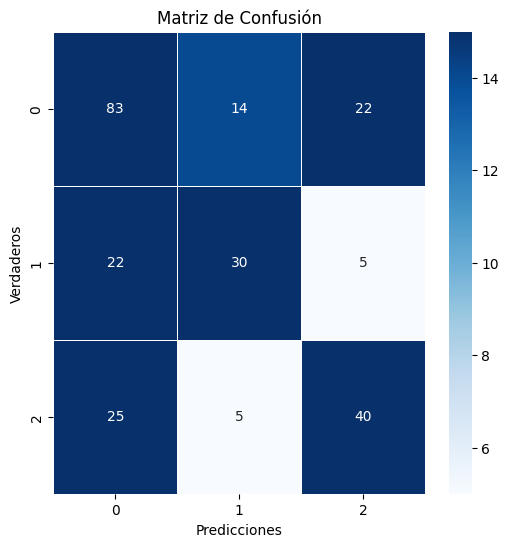

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame para la matriz de confusión
df_cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Configuración de la visualización
plt.figure(figsize=(6, 6))

sns.heatmap(df_cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=15,
            annot_kws={"size": 10})

plt.title('Matriz de Confusión', fontsize=12)  # Tamaño de la fuente del título
plt.xlabel('Predicciones', fontsize=10)  # Tamaño de la fuente del eje x
plt.ylabel('Verdaderos', fontsize=10)  # Tamaño de la fuente del eje y
plt.show()

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune n_estimators and other parameters

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


Accuracy of Random Forest Classifier: 0.6626

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.71       119
           1       0.66      0.58      0.62        57
           2       0.63      0.57      0.60        70

    accuracy                           0.66       246
   macro avg       0.66      0.64      0.64       246
weighted avg       0.66      0.66      0.66       246



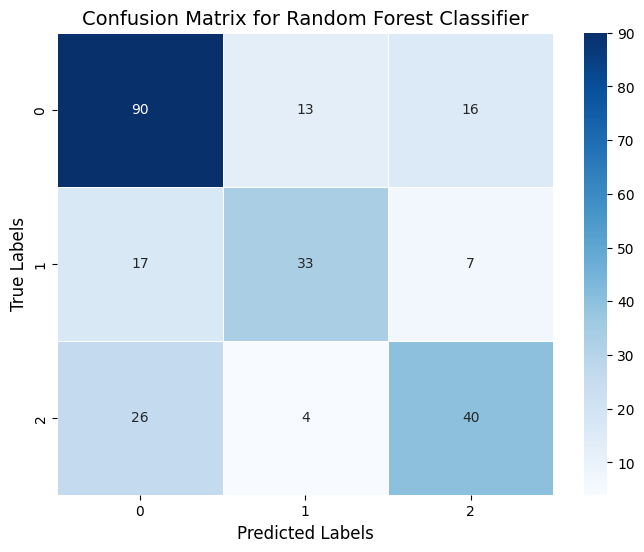

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_rf = pd.DataFrame(cm_rf, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_rf.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for Random Forest Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

Top 20 Most Important Features for Random Forest:


,Feature,Importance
226,ap17_3_o_más,0.014152
236,ap19_No_hay_libros_en_formato_papel,0.013472
448,ap28i_Selecciona,0.013238
230,ap18_No_tienen,0.011347
993,Nivel_Ed_Madre_Primaria_incompleto,0.010373
241,ap19_Más_de_100_libros,0.008732
190,ap16f_No,0.008212
232,ap18_Sí_tienen_2_o_más,0.008051
240,ap19_De_51_a_100_libros,0.007527
994,Nivel_Ed_Madre_Primaria_completo,0.007413


/tmp/ipython-input-3365565030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')


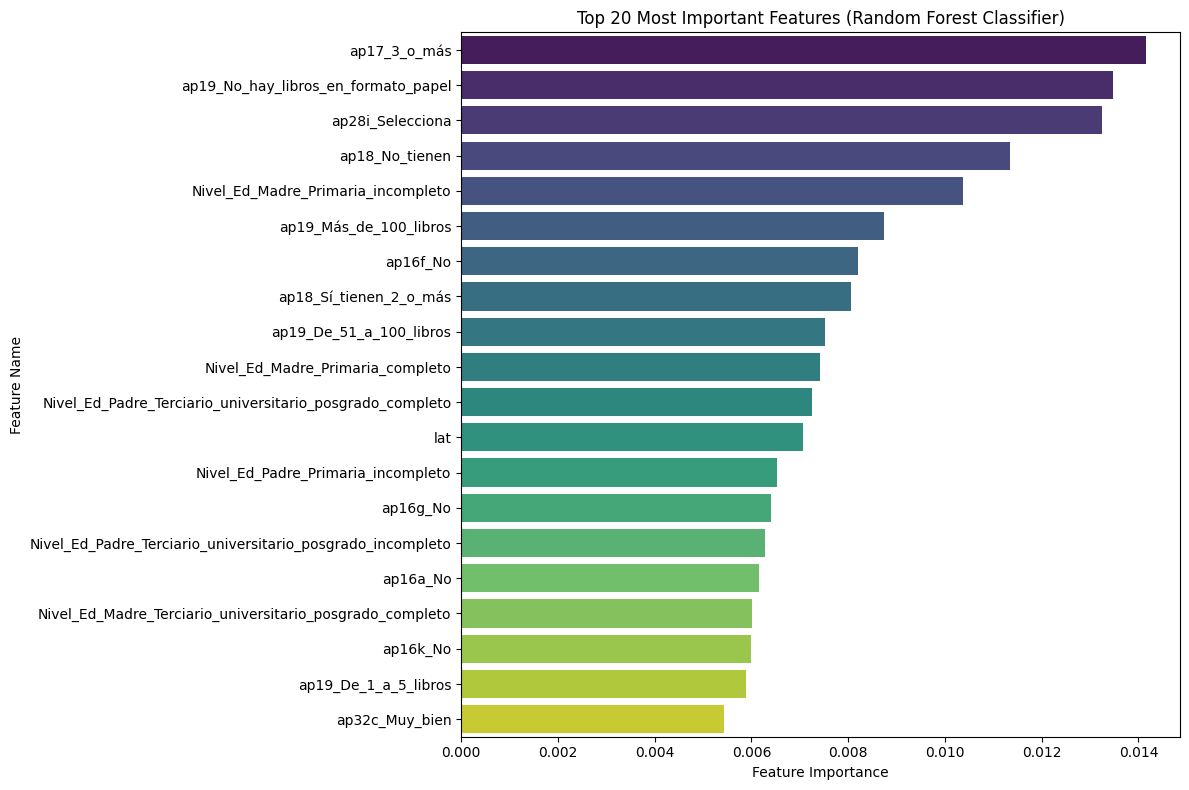

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest classifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the features by importance in descending order
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for Random Forest:")
display(features_df_rf.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Random Forest Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the base estimator (Decision Tree Classifier is common for AdaBoost)
# Using a shallow tree to prevent overfitting and to let AdaBoost combine weak learners
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Weights applied to each classifier at each boosting iteration.
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_classifier.fit(X_train, y_train)

print("AdaBoost Classifier trained successfully.")

AdaBoost Classifier trained successfully.


Accuracy of AdaBoost Classifier: 0.6016

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       119
           1       0.60      0.44      0.51        57
           2       0.55      0.43      0.48        70

    accuracy                           0.60       246
   macro avg       0.59      0.55      0.56       246
weighted avg       0.60      0.60      0.59       246



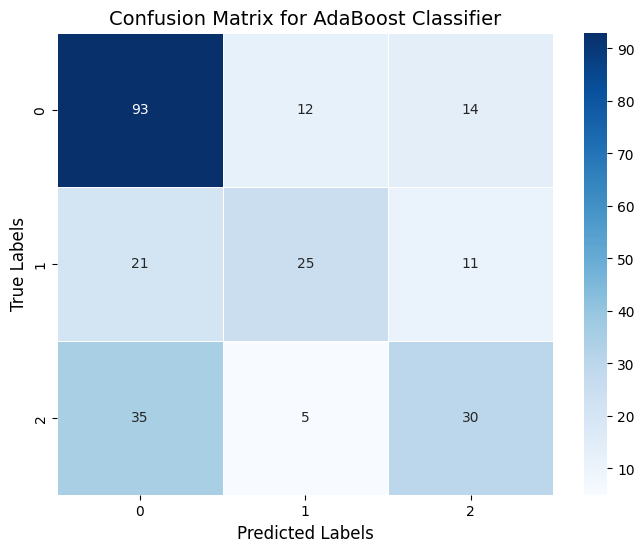

In [ ]:
# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, zero_division=0))

# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_ada = pd.DataFrame(cm_ada, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_ada,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_ada.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for AdaBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost Classifier
# Use 'multi:softmax' for multi-class classification
# 'objective' should match the type of target variable (here, integer labels)
# n_estimators: Number of boosting rounds (trees)
# random_state for reproducibility
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax', # For multi-class classification
    num_class=len(y_train.unique()), # Number of unique classes in the target
    n_estimators=100, # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    eval_metric='mlogloss', # Evaluation metric for multi-class classification
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train, y_train)

print("XGBoost Classifier trained successfully.")

XGBoost Classifier trained successfully.


Accuracy of XGBoost Classifier: 0.6463

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       119
           1       0.57      0.49      0.53        57
           2       0.63      0.66      0.64        70

    accuracy                           0.65       246
   macro avg       0.63      0.62      0.62       246
weighted avg       0.64      0.65      0.64       246



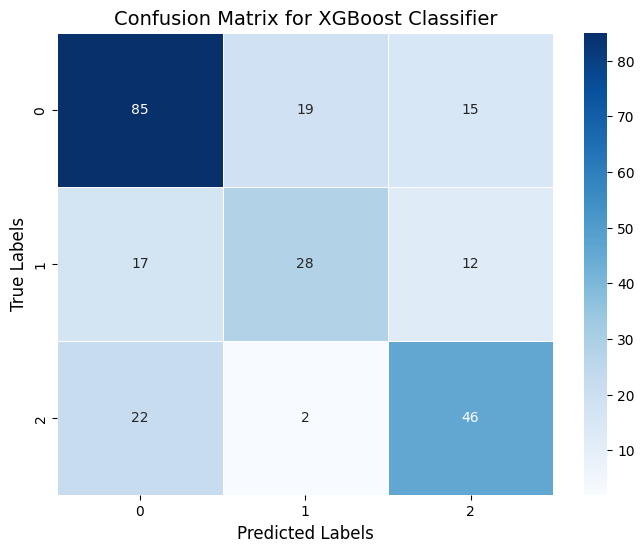

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_xgb = pd.DataFrame(cm_xgb, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_xgb,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_xgb.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for XGBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

Top 20 Most Important Features for XGBoost:


,Feature,Importance
1022,sector_binario,0.028542
535,ap32c_Bien,0.016037
536,ap32c_Regular,0.011801
190,ap16f_No,0.010226
164,ap16a_Sí,0.009534
230,ap18_No_tienen,0.009180
448,ap28i_Selecciona,0.009041
792,ap40g_No,0.008212
952,ap43i_No_selecciona,0.008083
1020,lat,0.008074


/tmp/ipython-input-1848411477.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


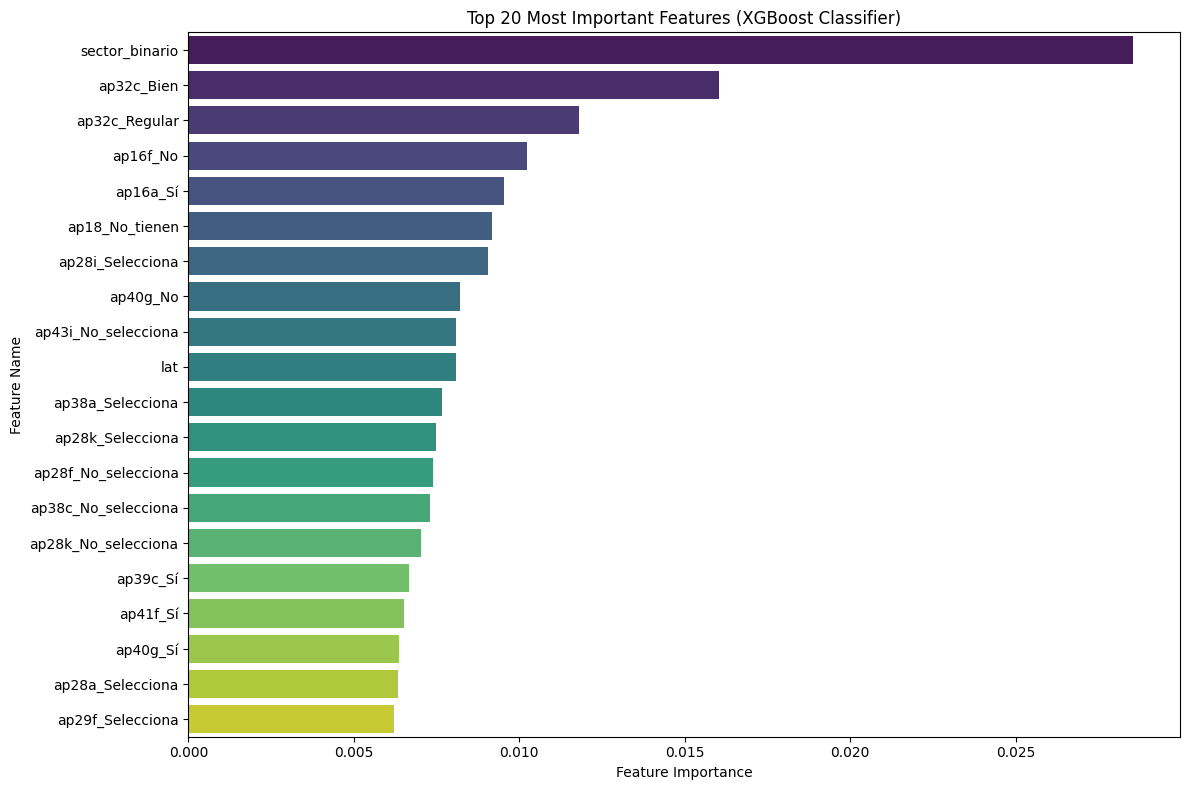

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for XGBoost:")
display(features_df.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (XGBoost Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()